In [1]:
from exprel.dataset.semeval_dataset import SemevalDataset
from exprel.models.utils import tree_to_code
from dotenv import load_dotenv 
load_dotenv()

True

In [2]:
data = SemevalDataset("/home/kovacs/projects/exp-relation-extraction/data/semeval_train.txt")

2021-08-13 09:31:33 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

/home/kovacs/miniconda3/envs/rel/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
2021-08-13 09:31:33 INFO: Use device: cpu
2021-08-13 09:31:33 INFO: Loading: tokenize
2021-08-13 09:31:33 INFO: Loading: pos
2021-08-13 09:31:34 INFO: Lo

In [3]:
from exprel.graph_extractor.extract import GraphExtractor
from exprel.models.model import GraphModel

extractor = GraphExtractor(lang="en", cache_fn="en_nlp_cache")
model = GraphModel()

In [16]:
data.parse_graphs(extractor)

NameError: name 'data' is not defined

In [5]:
data.set_graphs(graphs)

In [29]:
data.graphs = graphs

In [5]:
data.load_graphs("pickle.dat")

In [6]:
df = data.to_dataframe()

In [7]:
df_entity_des = df[df.label == "Entity-Destination(e2,e1)"]
df = df.drop(df_entity_des.index, axis=0)

In [8]:
df.groupby("label").size()

label
Cause-Effect(e1,e2)           344
Cause-Effect(e2,e1)           659
Component-Whole(e1,e2)        470
Component-Whole(e2,e1)        471
Content-Container(e1,e2)      374
Content-Container(e2,e1)      166
Entity-Destination(e1,e2)     844
Entity-Origin(e1,e2)          568
Entity-Origin(e2,e1)          148
Instrument-Agency(e1,e2)       97
Instrument-Agency(e2,e1)      407
Member-Collection(e1,e2)       78
Member-Collection(e2,e1)      612
Message-Topic(e1,e2)          490
Message-Topic(e2,e1)          144
Other                        1410
Product-Producer(e1,e2)       323
Product-Producer(e2,e1)       394
dtype: int64

In [9]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [10]:
df[10:30]

,sen_id,e1,e2,e1_lemma,e2_lemma,sentence,label,label_id,graph
10,11,essays,volume,essay,volume,The fifty essays collected in this volume testify to most of the prominent themes from Professor Quispel's scholarly career.,"Member-Collection(e1,e2)",12,"(103, 104, 105, 3, 106, 107, 108, 109, 6, 110, 111, 36, 112, 113, 9, 114, 115)"
11,12,composer,oblivion,composer,oblivion,Their composer has sunk into oblivion.,Other,16,"(116, 117, 9, 118, 19, 119)"
12,13,citation,reasons,citation,reason,The Pulitzer Committee issues an official citation explaining the reasons for the award.,"Message-Topic(e1,e2)",14,"(120, 121, 122, 123, 97, 124, 125, 126, 127)"
13,14,burst,pressure,burst,pressure,The burst has been caused by water hammer pressure.,"Cause-Effect(e2,e1)",1,"(56, 128, 129, 130, 131)"
14,15,networks,broadcast,network,broadcast,Even commercial networks have moved into high-definition broadcast.,"Instrument-Agency(e2,e1)",11,"(75, 132, 133, 134, 19, 135, 136, 137)"
15,16,call,bill,call,bill,It was a friendly call to remind them about the bill and make sure they have a copy of the invoice.,"Message-Topic(e1,e2)",14,"(14, 138, 139, 0, 140, 6, 141, 118, 142, 143, 144, 145, 146)"
16,17,virtuoso,instrument,virtuoso,instrument,"Texas-born virtuoso finds harmony, sophistication in Appalachian instrument.","Instrument-Agency(e2,e1)",11,"(147, 14, 148, 149, 150, 151, 3, 152, 153)"
17,18,factory,trays,factory,tray,"The factory's products have included flower pots, Finnish rooster-whistles, pans, trays, tea pots, ash trays and air moisturisers.","Product-Producer(e2,e1)",18,"(154, 14, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 9, 167)"
18,19,tree,blossom,tree,blossom,The girl showed a photo of apple tree blossom on a fruit tree in the Central Valley.,"Component-Whole(e2,e1)",3,"(168, 169, 6, 170, 171, 172, 173, 174, 175, 3, 176, 177)"
19,20,battalion,grenadiers,battalion,grenadier,"They tried an assault of their own an hour later, with two columns of sixteen tanks backed by a battalion of Panzer grenadiers.","Member-Collection(e2,e1)",13,"(178, 179, 180, 181, 6, 182, 118, 83, 183, 184, 185, 76, 16, 186, 187, 188, 189)"


In [11]:
import pandas as pd

ids = pd.to_numeric(df.sen_id).tolist()
sentences = df.sentence.tolist()
labels = df.label_id.tolist()
postprocessed_graphs = df.graph.tolist()

In [12]:
from tqdm import tqdm

for ind, graph, label in tqdm(zip(ids, postprocessed_graphs, labels)):
    model.featurize_sen_graph(ind, graph, label, 2)

7999it [01:33, 85.57it/s] 


In [13]:
model.vocab_size

210206

In [14]:
feature_graphs = model.get_feature_graphs()

In [15]:
model.select_n_best(1000)

In [16]:
X, Y = model.get_x_y(df.label.tolist())

In [17]:
from sklearn.model_selection import train_test_split as split

tr_data,tst_data,tr_labels,tst_labels = split(X,Y, test_size=0.2, random_state=1234)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(tr_data, tr_labels)
#clf = OneVsRestClassifier(RandomForestClassifier(random_state=0, max_depth=10)).fit(tr_data, tr_labels)

/home/kovacs/miniconda3/envs/rel/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
keys = model.label_vocab.word_to_id.keys()
labels_to_result = {}
lr_pred = clf.predict(tr_data)
#prf = precision_recall_fscore_support(tst_labels, lr_pred, average=None)
print(classification_report(tr_labels, lr_pred, target_names=keys, output_dict=False))

                           precision    recall  f1-score   support

   Component-Whole(e2,e1)       0.82      0.75      0.78       384
                    Other       0.65      0.63      0.64      1127
 Instrument-Agency(e2,e1)       0.82      0.84      0.83       323
 Member-Collection(e1,e2)       1.00      0.51      0.67        63
      Cause-Effect(e2,e1)       0.91      0.86      0.88       533
Entity-Destination(e1,e2)       0.85      0.95      0.90       648
 Content-Container(e1,e2)       0.88      0.93      0.90       298
     Message-Topic(e1,e2)       0.75      0.80      0.78       391
  Product-Producer(e2,e1)       0.78      0.74      0.76       324
 Member-Collection(e2,e1)       0.78      0.91      0.84       496
     Entity-Origin(e1,e2)       0.80      0.92      0.85       474
      Cause-Effect(e1,e2)       0.97      0.82      0.89       271
   Component-Whole(e1,e2)       0.83      0.75      0.79       375
     Message-Topic(e2,e1)       0.79      0.73      0.76     

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

from sklearn.tree import plot_tree
t = plot_tree(clf.estimators_[4], filled=True, fontsize=7)


In [20]:
import eli5

In [ ]:
weights_df = eli5.explain_weights_df(clf.estimators_[5])

In [22]:
weights_df = eli5.explain_weights_df(clf)

In [ ]:
weights_df

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(clf.estimators_[5])
shap_values = explainer(tr_data)

In [ ]:
shap.plots.bar(shap_values[:,:,1].mean(0), order=shap.Explanation.argsort.flip)

In [24]:
feature_graph_strings = model.get_feature_graph_strings()

In [ ]:
from collections import defaultdict
features = defaultdict(list)

for j, est in enumerate(clf.estimators_):
    weights_df = eli5.explain_weights_df(est)
    most_important_weights = weights_df.iloc[:5].feature.str.strip("x").tolist()
    for i in most_important_weights:
        if i != "<BIAS>":
            g_nx = feature_graphs[model.inverse_relabel[int(i)]]
            if len(g_nx.edges()):
                g = feature_graph_strings[model.inverse_relabel[int(i)]]
                features[list(keys)[j]].append(([g], [], model.label_vocab.id_to_word[j]))

In [59]:
features

defaultdict(list,
            {'Component-Whole(e2,e1)': [(['(u_1088 / comprise  :1 (u_4 / entity1))'],
               [],
               'Component-Whole(e2,e1)'),
              (['(u_22 / use  :2 (u_7 / entity2))'],
               [],
               'Component-Whole(e2,e1)'),
              (['(u_0 / have  :2 (u_7 / entity2))'],
               [],
               'Component-Whole(e2,e1)'),
              (['(u_14 / COORD  :0 (u_0 / have)  :1 (u_4 / entity1))'],
               [],
               'Component-Whole(e2,e1)')],
             'Other': [(['(u_31 / from  :2 (u_7 / entity2))'], [], 'Other'),
              (['(u_4 / entity1  :0 (u_71 / contain))'], [], 'Other')],
             'Instrument-Agency(e2,e1)': [(['(u_68 / with  :2 (u_7 / entity2))'],
               [],
               'Instrument-Agency(e2,e1)'),
              (['(u_22 / use  :2 (u_7 / entity2))'],
               [],
               'Instrument-Agency(e2,e1)'),
              (['(u_22 / use  :1 (u_4 / entity1))'],
          

In [25]:
from collections import defaultdict
features = defaultdict(list)

for target in weights_df.target.unique():
    targeted_df = weights_df[weights_df.target == target]
    most_important_weights = targeted_df.iloc[:5].feature.str.strip("x").tolist()
    for i in most_important_weights:
        if i != "<BIAS>":
            g_nx = feature_graphs[model.inverse_relabel[int(i)]]
            if len(g_nx.edges()):
                g = feature_graph_strings[model.inverse_relabel[int(i)]]
                features[list(keys)[int(target)]].append(([g], [], model.label_vocab.id_to_word[int(target)]))

In [26]:
import json

with open("features.json", "w+") as f:
    json.dump(features, f)

In [27]:
train, val = split(df, test_size=0.2, random_state=1234) 

In [28]:
train

,sen_id,e1,e2,e1_lemma,e2_lemma,sentence,label,label_id,graph
4444,4445,Elephants,holes,elephant,hole,"Elephants have been observed digging holes to drink water and then ripping bark from a tree, chewing it into the shape of a ball, filling in the hole and covering over it with sand to avoid evapor...","Product-Producer(e2,e1)",18,"(2252, 6318, 1646, 108, 14, 2065, 6314, 1747, 323, 2102, 4780, 83, 769, 1718, 3, 19, 2784, 6, 546, 5516, 606, 36, 171, 959, 130, 1981)"
5277,5278,scenes,newspapers,scene,newspaper,The harrowing scenes were reported over several weeks in national newspapers.,"Message-Topic(e2,e1)",15,"(232, 1648, 12611, 996, 293, 656, 3, 367, 3643)"
4381,4382,mass,flask,mass,flask,The results were obtained after measuring the cell mass in a flask.,"Content-Container(e1,e2)",4,"(1993, 65, 410, 4189, 2191, 378, 3, 94)"
896,897,gas,pyrolysis,gas,pyrolysis,The heated gas caused a pyrolysis on the lower part of oil shale and produced shale oil and oil shale gas are escaped from the retort through exhaust pipe.,"Cause-Effect(e1,e2)",0,"(14, 346, 722, 4281, 2596, 725, 36, 4282, 376, 2857, 4283, 56, 4284, 174, 71, 2129, 6, 2329)"
6334,6335,driver,keys,driver,key,"The man took driver's keys until the arrival of police, thus preventing him from leaving.","Entity-Origin(e2,e1)",9,"(264, 4063, 231, 1465, 36, 623, 1349, 9, 730, 1341, 2602, 1340, 6, 791)"
...,...,...,...,...,...,...,...,...,...
3277,3278,occupants,property,occupant,property,"The owner returns the amount paid by way of guarantee deposit, within 31 days after the occupants' departure from the property.","Entity-Origin(e1,e2)",8,"(6037, 3077, 1570, 5144, 410, 36, 1068, 9, 9636, 491, 642, 9637, 855, 6, 3767, 5892, 2171)"
7222,7223,courts,test,court,test,The courts created the Freeman-Walter-Abele test to determine whether an algorithm only represents an abstract idea.,"Product-Producer(e2,e1)",18,"(727, 2758, 15136, 10213, 15137, 702, 108, 3005, 3124, 844, 4277, 1255, 922)"
1318,1319,squadron,dragoons,squadron,dragoon,"On 29 August 1914, C Squadron of the 12th Lancers made a successful charge against a dismounted squadron of Prussian dragoons.","Member-Collection(e2,e1)",13,"(138, 598, 3151, 560, 5337, 5479, 6, 4524, 5480, 5481, 5482, 5483, 5484, 174, 5485)"
723,724,month,sundays,month,sunday,A month of snowy sundays in January had an adverse impact on Prospect's finances.,Other,16,"(0, 3774, 3775, 174, 3776, 9, 3777, 1469, 6, 3778, 3779, 3, 3780)"


In [29]:
train.to_pickle("train_dataset")
val.to_pickle("val_dataset")

In [ ]:
def one_versus_rest(df, entity):
    mapper = {entity: 1}

    one_versus_rest_df = df.copy()
    one_versus_rest_df["one_versus_rest"] = [
        mapper[item] if item in mapper else 0 for item in df.label]

    return one_versus_rest_df

graphs = train.graph.tolist()
labels = one_versus_rest(train, "Cause-Effect(e2,e1)").one_versus_rest.tolist()

In [ ]:
lr_pred = clf.estimators_[4].predict(tr_data)
prf = precision_recall_fscore_support(labels, lr_pred, average=None)

In [ ]:
prf

In [ ]:
val_graphs = val.graph.tolist()
val_labels = val.one_versus_rest.tolist()

In [ ]:
val_df = val.copy()

In [ ]:
del val_df["one_versus_rest"]

In [ ]:
from graphviz import Source
Source(to_dot(val_graphs[1537]))

In [ ]:
val.iloc[1537]

In [ ]:
import networkx as nx
all_features = nx.MultiDiGraph()

In [ ]:
for i, t in enumerate(weights_df.iloc[:10].feature.str.strip("x").tolist()):
    node_to_string = {}
    g = feature_graphs[model.inverse_relabel[int(t)]]
    nodes = []
    for n in g.nodes(data=True):
        n_post = n[1]["name"]+"_feature"+str(i)
        nodes.append(n_post)
        node_to_string[n[0]] = n_post
    all_features.add_nodes_from(nodes)
    
    for e in g.edges(data=True):
        all_features.add_edge(node_to_string[e[0]], node_to_string[e[1]], color=e[2]["color"])
        

In [ ]:
from graphviz import Digraph
from graphviz import Source
# Create Digraph object
dot = to_dot(all_features, integ=True)
Source(dot)

In [25]:
from graphviz import Digraph
from graphviz import Source
# Create Digraph object
dot = to_dot(feature_graphs[model.inverse_relabel[404]])

NameError: name 'feature_graphs' is not defined

In [ ]:
Source(dot)

In [23]:
import re

def d_clean(string):
    s = string
    for c in '\\=@-,\'".!:;<>/{}[]()#^?':
        s = s.replace(c, '_')
    s = s.replace('$', '_dollars')
    s = s.replace('%', '_percent')
    s = s.replace('|', ' ')
    s = s.replace('*', ' ')
    if s == '#':
        s = '_number'
    keywords = ("graph", "node", "strict", "edge")
    if re.match('^[0-9]', s) or s in keywords:
        s = "X" + s
    return s

def to_dots(graphs, marked_nodes=set(), integ=False):
    lines = [u'digraph finite_state_machine {', '\tdpi=70;']
    # lines.append('\tordering=out;')
    # sorting everything to make the process deterministic
    for i, graph in enumerate(graphs):
        s = "subgraph cluster_" + chr(ord('@')+i+1) + " {"
        node_lines = []

        node_lines.append(s)
        node_to_name = {}
        for node, n_data in graph.nodes(data=True):
            if integ:
                d_node = d_clean(str(node))
            else:    
                d_node = d_clean(n_data["name"])
            printname = d_node
            node_to_name[node] = printname
            if 'expanded' in n_data and n_data['expanded'] and printname in marked_nodes:
                node_line = u'\t{0} [shape = circle, label = "{1}", \
                        style=filled, fillcolor=purple];'.format(
                    d_node, printname).replace('-', '_')
            elif 'expanded' in n_data and n_data['expanded']:
                node_line = u'\t{0} [shape = circle, label = "{1}", \
                        style="filled"];'.format(
                    d_node, printname).replace('-', '_')
            elif 'fourlang' in n_data and n_data['fourlang']:
                node_line = u'\t{0} [shape = circle, label = "{1}", \
                        style="filled", fillcolor=red];'.format(
                    d_node, printname).replace('-', '_')
            elif 'substituted' in n_data and n_data['substituted']:
                node_line = u'\t{0} [shape = circle, label = "{1}", \
                        style="filled"];'.format(
                    d_node, printname).replace('-', '_')
            elif printname in marked_nodes:
                node_line = u'\t{0} [shape = circle, label = "{1}", style=filled, fillcolor=lightblue];'.format(
                    d_node, printname).replace('-', '_')
            else:
                node_line = u'\t{0} [shape = circle, label = "{1}"];'.format(
                    d_node, printname).replace('-', '_')
            node_lines.append(node_line)
        lines += sorted(node_lines)

        edge_lines = []
        for u, v, edata in graph.edges(data=True):
            if 'color' in edata:
                d_node1 = node_to_name[u]
                d_node2 = node_to_name[v]
                edge_lines.append(
                    u'\t{0} -> {1} [ label = "{2}" ];'.format(d_node1, d_node2, edata['color']))

        lines += sorted(edge_lines)
        lines.append('}')
    lines.append('}')
    return u'\n'.join(lines)

def to_dot(graph, marked_nodes=set(), integ=False):
    lines = [u'digraph finite_state_machine {', '\tdpi=70;']
    # lines.append('\tordering=out;')
    # sorting everything to make the process deterministic
    node_lines = []
    node_to_name = {}
    for node, n_data in graph.nodes(data=True):
        if integ:
            d_node = d_clean(str(node))
        else:    
            d_node = d_clean(n_data["name"])
        printname = d_node
        node_to_name[node] = printname
        if 'expanded' in n_data and n_data['expanded'] and printname in marked_nodes:
            node_line = u'\t{0} [shape = circle, label = "{1}", \
                    style=filled, fillcolor=purple];'.format(
                d_node, printname).replace('-', '_')
        elif 'expanded' in n_data and n_data['expanded']:
            node_line = u'\t{0} [shape = circle, label = "{1}", \
                    style="filled"];'.format(
                d_node, printname).replace('-', '_')
        elif 'fourlang' in n_data and n_data['fourlang']:
            node_line = u'\t{0} [shape = circle, label = "{1}", \
                    style="filled", fillcolor=red];'.format(
                d_node, printname).replace('-', '_')
        elif 'substituted' in n_data and n_data['substituted']:
            node_line = u'\t{0} [shape = circle, label = "{1}", \
                    style="filled"];'.format(
                d_node, printname).replace('-', '_')
        elif printname in marked_nodes:
            node_line = u'\t{0} [shape = circle, label = "{1}", style=filled, fillcolor=lightblue];'.format(
                d_node, printname).replace('-', '_')
        else:
            node_line = u'\t{0} [shape = circle, label = "{1}"];'.format(
                d_node, printname).replace('-', '_')
        node_lines.append(node_line)
    lines += sorted(node_lines)

    edge_lines = []
    for u, v, edata in graph.edges(data=True):
        if 'color' in edata:
            d_node1 = node_to_name[u]
            d_node2 = node_to_name[v]
            edge_lines.append(
                u'\t{0} -> {1} [ label = "{2}" ];'.format(d_node1, d_node2, edata['color']))

    lines += sorted(edge_lines)
    lines.append('}')
    return u'\n'.join(lines)

In [38]:
import re

In [58]:
strin = "favorite|better"
re.match(fr"\b({strin})\b", "fav")

In [17]:
import spacy
import amrlib
amrlib.setup_spacy_extension()
nlp = spacy.load('en_core_web_md')

In [18]:
doc = nlp('RT @Jazzlaro: If Muslims hate Dogs🐶 Beer🍺Bacon 🥓Bikinis 👙 Jesus 🙏&amp; Freedom of Speech 🗣, why exactly do they come to America? 🇺🇸')
graphs = doc._to_amr()
for graph in graphs:
    print(graph)

# ::snt RT @Jazzlaro:
(t / tweet-01
      :ARG0 (ii / i)
      :ARG2 (p / person
            :name (n / name
                  :op1 "Jazzlaro")))
# ::snt If Muslims hate Dogs🐶 Beer🍺Bacon 🥓Bikinis 👙 Jesus 🙏&amp; Freedom of Speech 🗣, why exactly do they come to America? 🇺🇸
(c / come-01
      :ARG1 (t / they)
      :ARG4 (c2 / country
            :name (n / name
                  :op1 "America"))
      :ARG1-of (c3 / cause-01
            :ARG0 (a / amr-unknown
                  :mod (e / exact)))
      :condition (h / hate-01
            :ARG0 (p / person
                  :mod (r / religious-group
                        :name (n2 / name
                              :op1 "Muslim")))
            :ARG1 (a2 / and
                  :op1 (d / dog)
                  :op2 (b / beer)
                  :op3 (b2 / bacon)
                  :op4 (b3 / bikini)
                  :op5 (p2 / person
                        :name (n3 / name
                              :op1 "Jesus"))
                  :

In [29]:
import amrlib
stog = amrlib.load_stog_model()

In [30]:
sens = ["RT @thehill: Poll: 45 percent of Americans say Trump should be impeached https://t.co/zbtetoUUfW https://t.co/2GQoRqr0NP"]

In [31]:
graphs = stog.parse_sents(sens)
for graph in graphs:
    print(graph)

gid=x Start paren present but say-01 is not a new concept


# ::snt RT @thehill: Poll: 45 percent of Americans say Trump should be impeached https://t.co/zbtetoUUfW https://t.co/2GQoRqr0NP
(s / say-01
      :ARG0 (p / person
            :name (n / name
                  :op1 "Thehill"))
      :ARG1 (p2 / poll-01
            :ARG0 (p3 / person
                  :mod (c / country
                        :name (n2 / name
                              :op1 "America"))
                  :quant (p4 / percentage-entity
                        :value 45))
            :ARG1 (r / recommend-01
                  :ARG1 (ii / impeach-01
                        :ARG1 (p5 / person
                              :name (n3 / name
                                    :op1 "Trump")))))
      :ARG1-of p2
      :ARG2 (u / url-entity
            :value "http://t.co/2GQoRqr0NP"))


In [20]:
from exprel.dataset.utils import amr_pn_to_graph

In [32]:
G, _ = amr_pn_to_graph(graph)

In [34]:
G.nodes(data=True)

NodeDataView({0: {'name': 'say'}, 1: {'name': 'person'}, 2: {'name': 'name'}, 3: {'name': 'poll'}, 4: {'name': 'person'}, 5: {'name': 'country'}, 6: {'name': 'name'}, 7: {'name': 'percentage'}, 8: {'name': 'recommend'}, 9: {'name': 'impeach'}, 10: {'name': 'person'}, 11: {'name': 'name'}, 12: {'name': 'url'}, 13: {'name': '"Thehill"'}, 14: {'name': '"America"'}, 15: {'name': '45'}, 16: {'name': '"Trump"'}, 17: {'name': '"http://t.co/2GQoRqr0NP"'}})

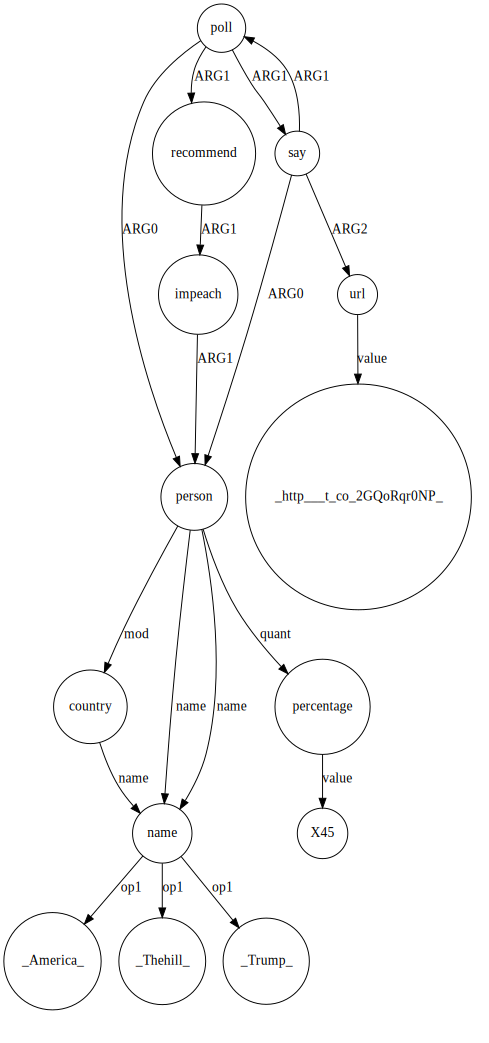

In [33]:
Source(to_dot(G))

In [9]:
import penman as pn

In [10]:
print(graph)

# ::snt hate wen females hit ah nigga with tht bro 👿
(h / hit-02
      :ARG0 (f / female
            :mod (h2 / hate-01))
      :ARG1 (n / nigga)
      :ARG2 (p / person
            :ARG0-of (h3 / have-rel-role-91
                  :ARG1 f
                  :ARG2 (b / bro))))


In [11]:
g = pn.decode(graph)

In [12]:
g.triples

[('h', ':instance', 'hit-02'),
 ('h', ':ARG0', 'f'),
 ('f', ':instance', 'female'),
 ('f', ':mod', 'h2'),
 ('h2', ':instance', 'hate-01'),
 ('h', ':ARG1', 'n'),
 ('n', ':instance', 'nigga'),
 ('h', ':ARG2', 'p'),
 ('p', ':instance', 'person'),
 ('h3', ':ARG0', 'p'),
 ('h3', ':instance', 'have-rel-role-91'),
 ('h3', ':ARG1', 'f'),
 ('h3', ':ARG2', 'b'),
 ('b', ':instance', 'bro')]

In [13]:
s = "a-b"

t = s.split("-")[:-1]
print(t)

['a']


In [ ]:
RT @Jazzlaro: If Muslims hate Dogs🐶 Beer🍺Bacon 🥓Bikinis 👙 Jesus 🙏&amp; Freedom of Speech 🗣, why exactly do they come to America? 🇺🇸